# Proyek Analisis Data: [E-commerce-public-dataset]
- **Nama:** [Novrini]
- **Email:** [novrinidaulay@gmail.com]
- **ID Dicoding:** [b25b9d047]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apa yang paling banyak terjual (berdasarkan jumlah pesanan) dan paling sedikit terjual?
- Pertanyaan 2 : Negara bagian mana yang memiliki jumlah pelanggan terbanyak?

## Import Semua Packages/Library yang Digunakan



In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Wrangling

### Gathering Data

Memuat data Customer

In [36]:
customers_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1R32_cGTac6lhMl2VEjDp2LabYdN3ooKZ")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Memuat data order item

In [37]:
orderitem_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1IRXg-HLQ5RhzxBDpaJLx7RDz7VcimHXu")
orderitem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Memuat data keseluruhan order

In [38]:
orders_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1PufcbcH-ulCZwJll1rHoxuuiSIRWcz9T")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Memuat data terjemahan kategori nama produk

In [39]:
product_category_name_translation_df = pd.read_csv("https://drive.google.com/uc?export=download&id=1n9qtC6Q3-IuBElI-TbRTwgojdVJy6fgT")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Memuat data produk

In [40]:
products_df = pd.read_csv("https://drive.google.com/uc?export=download&id=14LDHgib6F3UayouO5DNzY3rDNOMPlBS0")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Memuat data order payment

In [41]:
orderpayment_df = pd.read_csv("https://drive.google.com/uc?export=download&id=109PKDDMqK25zgo1RX8q2sPZvYfQ3sySP")
orderpayment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- customers_df: Berisi informasi pelanggan, termasuk ID unik mereka, prefiks kode pos, kota, dan negara bagian. Data ini dapat digunakan untuk menganalisis demografi pelanggan dan distribusi geografis.
- orderitem_df: Berisi informasi tentang item individual dalam pesanan, termasuk ID produk, ID penjual, tanggal batas pengiriman, harga, dan nilai pengiriman. Ini penting untuk menganalisis kinerja produk, harga, dan biaya pengiriman.
- orders_df: Menyediakan informasi umum tentang setiap pesanan, termasuk ID pelanggan, status pesanan, dan stempel waktu untuk berbagai tahap proses pesanan. Data ini penting untuk melacak pemenuhan pesanan dan waktu pengiriman.
- product_category_name_translation_df: Tabel pencarian yang menerjemahkan nama kategori produk dari bahasa Portugis ke bahasa Inggris. Ini membantu untuk memahami kategori produk dalam format yang lebih mudah diakses.
- products_df: Berisi detail tentang produk, termasuk nama kategori produk, panjang nama, panjang deskripsi, jumlah foto, serta dimensi dan berat. Data ini dapat digunakan untuk menganalisis karakteristik produk dan berpotensi mengidentifikasi faktor-faktor yang memengaruhi penjualan atau ulasan.



### Assessing Data

Menilai data dari keseluruhan data frame

In [42]:
print("Info untuk customers_df:")
customers_df.info()
print("\nInfo untuk orderitem_df:")
orderitem_df.info()
print("\nInfo untuk orders_df:")
orders_df.info()
print("\nInfo untuk product_category_name_translation_df:")
product_category_name_translation_df.info()
print("\nInfo untuk products_df:")
products_df.info()
print("\nInfo untuk orderpayment_df:")
orderpayment_df.info()

Info untuk customers_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Info untuk orderitem_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  objec

Mengecek data duplikat

In [43]:
print("Jumlah duplikat dalam customers_df:", customers_df.duplicated().sum())
print("Jumlah duplikat dalam orderitem_df:", orderitem_df.duplicated().sum())
print("Jumlah duplikat dalam orders_df:", orders_df.duplicated().sum())
print("Jumlah duplikat dalam product_category_name_translation_df:", product_category_name_translation_df.duplicated().sum())
print("Jumlah duplikat dalam products_df:", products_df.duplicated().sum())
print("Jumlah duplikat dalam orderpayment_df:", orderpayment_df.duplicated().sum())

Jumlah duplikat dalam customers_df: 0
Jumlah duplikat dalam orderitem_df: 0
Jumlah duplikat dalam orders_df: 0
Jumlah duplikat dalam product_category_name_translation_df: 0
Jumlah duplikat dalam products_df: 0
Jumlah duplikat dalam orderpayment_df: 0


Menilai parameter statistik data frame

In [44]:
print("Parameter statistik untuk customers_df:")
display(customers_df.describe(include='all'))
print("\nParameter statistik untuk orderitem_df:")
display(orderitem_df.describe(include='all'))
print("\nParameter statistik untuk orders_df:")
display(orders_df.describe(include='all'))
print("\nParameter statistik untuk product_category_name_translation_df:")
display(product_category_name_translation_df.describe(include='all'))
print("\nParameter statistik untuk products_df:")
display(products_df.describe(include='all'))
print("\nParameter statistik untuk orderpayment_df:")
display(orderpayment_df.describe(include='all'))

Parameter statistik untuk customers_df:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN



Parameter statistik untuk orderitem_df:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000



Parameter statistik untuk orders_df:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522



Parameter statistik untuk product_category_name_translation_df:


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1



Parameter statistik untuk products_df:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000



Parameter statistik untuk orderpayment_df:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- orders_df memiliki missing values di kolom tanggal dan perlu konversi tipe data.
- products_df memiliki missing values di beberapa kolom deskriptif dan dimensi/berat.

### Cleaning Data

## Menangani missing values di `orders df`

Tangani missing values di kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.

In [45]:
print("Missing values in orders_df before handling:")
print(orders_df[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().sum())

Missing values in orders_df before handling:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64


Konversi data ke datetime

In [46]:
date_columns_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns_to_convert:
    orders_df[col] = pd.to_datetime(orders_df[col], errors='coerce')

print("Info untuk orders_df setelah konversi tipe data:")
orders_df.info()
print("\nMissing values di orders_df setelah konversi:")
print(orders_df[date_columns_to_convert].isnull().sum())

Info untuk orders_df setelah konversi tipe data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB

Missing values di orders_df setelah konversi:
order_purchase_timestamp            0
order_approved_at            

#### Menangani missing values di `products df`

Periksa dan tangani missing values di kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.

In [47]:
print("Missing values in products_df before handling:")
print(products_df.isnull().sum())

Missing values in products_df before handling:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [48]:
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

print("\nMissing values in products_df after handling:")
print(products_df.isnull().sum())


Missing values in products_df after handling:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight dari Pembersihan Data orders_df:**
- Konversi Tipe Data Tanggal: Kita berhasil mengubah kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date dari tipe data objek (string) menjadi tipe data datetime.
- Implikasi tipe data datetime, kita sekarang dapat dengan akurat melakukan perhitungan berbasis waktu, seperti durasi antara berbagai tahapan pesanan (misalnya, waktu pemrosesan, waktu pengiriman). Ini sangat penting untuk analisis performa operasional dan logistik.

**Insight dari Pembersihan Data products_df :**
- Mengidentifikasi dan menghapus baris-baris yang memiliki missing values pada kolom kunci seperti nama kategori, panjang nama/deskripsi, jumlah foto, serta dimensi dan berat produk.
- meskipun sejumlah kecil baris (610 + 2) dihapus, data produk yang tersisa sekarang lengkap pada kolom-kolom deskriptif dan fisik yang penting. Ini memastikan bahwa setiap kali kita menganalisis karakteristik produk atau menggabungkan data produk dengan data pesanan/ulasan, kita bekerja dengan informasi produk yang utuh dan konsisten.

## Exploratory Data Analysis (EDA)

Eksplorasi untuk pertanyaan bisnis 1 :

- Hitung jumlah pesanan untuk setiap produk.
- Identifikasi produk dengan jumlah pesanan terbanyak (terlaris) dan paling sedikit (kurang laris).
- Gabungkan dengan data produk untuk mendapatkan nama/kategori produk terlaris/kurang laris.


Hitung jumlah pesanan untuk setiap produk.


In [49]:
product_order_counts = orderitem_df['product_id'].value_counts()
print("Number of orders per product:")
print(product_order_counts.head())

Number of orders per product:
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64



Identifikasi produk dengan jumlah pesanan terbanyak (terlaris) dan paling sedikit (kurang laris).


In [50]:
top_selling_products = product_order_counts.head(5)
least_selling_products = product_order_counts.tail(5)

print("Top 5 Most Selling Products (by order count):")
print(top_selling_products)

print("\nBottom 5 Least Selling Products (by order count):")
print(least_selling_products)

Top 5 Most Selling Products (by order count):
product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

Bottom 5 Least Selling Products (by order count):
product_id
038c0dd7c1e48a1588f8919a0c305727    1
aa20709d44e96059764f1b0386d3bcfa    1
9ae3dacfd2327107a1e28274fac25a4e    1
0c398b245c9b74ef2bf4343b6fe73237    1
446295cf6f689d4db477145815362608    1
Name: count, dtype: int64



Gabungkan dengan data produk untuk mendapatkan nama/kategori produk terlaris/kurang laris.


In [51]:
top_selling_products_with_info = pd.merge(top_selling_products, products_df, left_index=True, right_on='product_id')
least_selling_products_with_info = pd.merge(least_selling_products, products_df, left_index=True, right_on='product_id')

print("Top 5 Most Selling Products with Product Information:")
display(top_selling_products_with_info)

print("\nBottom 5 Least Selling Products with Product Information:")
display(least_selling_products_with_info)

Top 5 Most Selling Products with Product Information:


,count,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
13430,527,aca2eb7d00ea1a7b8ebd4e68314663af,moveis_decoracao,44.0,903.0,6.0,2600.0,50.0,10.0,30.0
9661,488,99a4788cb24856965c36a24e339b6058,cama_mesa_banho,54.0,245.0,1.0,1383.0,50.0,10.0,40.0
14051,484,422879e10f46682990de24d770e7f83d,ferramentas_jardim,56.0,348.0,2.0,1550.0,30.0,22.0,30.0
30293,392,389d119b48cf3043d311335e499d9c6b,ferramentas_jardim,59.0,341.0,2.0,1750.0,37.0,22.0,40.0
4598,388,368c6c730842d78016ad823897a372db,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0



Bottom 5 Least Selling Products with Product Information:


,count,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3928,1,038c0dd7c1e48a1588f8919a0c305727,eletrodomesticos,45.0,78.0,1.0,100.0,20.0,13.0,15.0
31132,1,aa20709d44e96059764f1b0386d3bcfa,relogios_presentes,48.0,692.0,2.0,550.0,16.0,11.0,11.0
1883,1,9ae3dacfd2327107a1e28274fac25a4e,cama_mesa_banho,59.0,463.0,2.0,1900.0,48.0,8.0,39.0
30359,1,0c398b245c9b74ef2bf4343b6fe73237,moveis_decoracao,27.0,332.0,1.0,1750.0,23.0,23.0,16.0
203,1,446295cf6f689d4db477145815362608,papelaria,59.0,209.0,1.0,1400.0,16.0,44.0,37.0


### Eksplorasi untuk Pertanyaan Bisnis 2

- Hitung jumlah pelanggan unik per negara bagian.
- Identifikasi negara bagian dengan jumlah pelanggan terbanyak.


Hitung jumlah pelanggan unik per negara bagian.


In [52]:
customers_per_state = customers_df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False)
print("Number of unique customers per state:")
display(customers_per_state)

Number of unique customers per state:


,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964



Identifikasi negara bagian dengan jumlah pelanggan terbanyak.


In [53]:
most_customers_state = customers_per_state.index[0]
print(f"The state with the most customers is: {most_customers_state}")

The state with the most customers is: SP


## Visualization & Explanatory Analysis

## Pertanyaan Bisnis 1


Visualisasikan produk terlaris/kurang laris.

/tmp/ipython-input-3289358382.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_category_name_english', data=top_selling_products_with_info, palette='viridis')


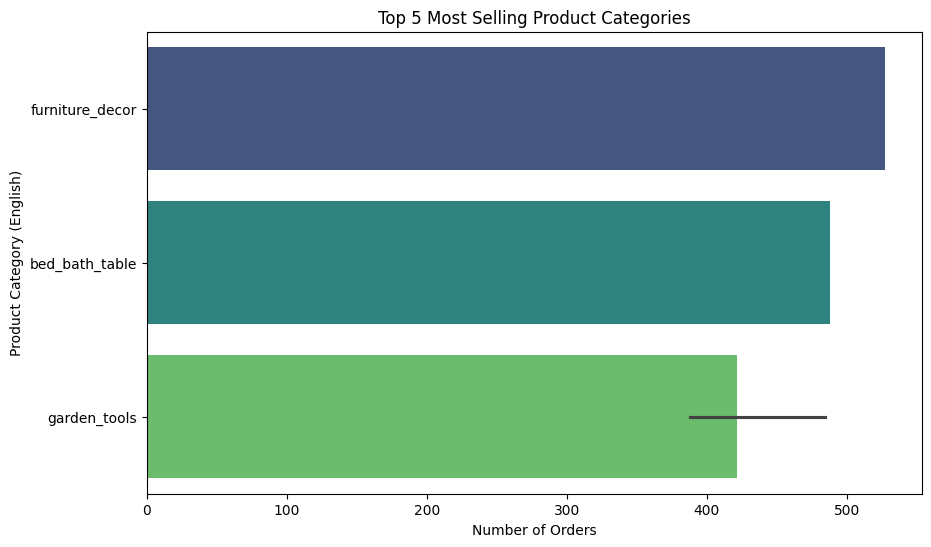

/tmp/ipython-input-3289358382.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='product_category_name_english', data=least_selling_products_with_info, palette='viridis')


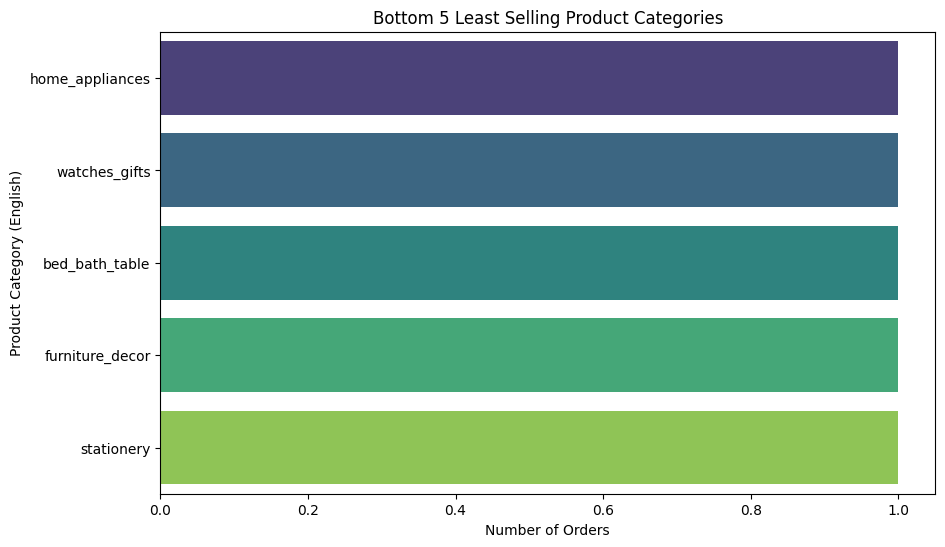

In [54]:
# Merge with translation data to get English category names
top_selling_products_with_info = pd.merge(top_selling_products_with_info, product_category_name_translation_df, on='product_category_name', how='left')
least_selling_products_with_info = pd.merge(least_selling_products_with_info, product_category_name_translation_df, on='product_category_name', how='left')


plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='product_category_name_english', data=top_selling_products_with_info, palette='viridis')
plt.title('Top 5 Most Selling Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category (English)')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='product_category_name_english', data=least_selling_products_with_info, palette='viridis')
plt.title('Bottom 5 Least Selling Product Categories')
plt.xlabel('Number of Orders')
plt.ylabel('Product Category (English)')
plt.show()

**Insight:**
- Produk paling laris berdasarkan jumlah pesanan adalah produk dengan ID `aca2eb7d00ea1a7b8ebd4e68314663af` (kategori: furniture\_decor) dengan 527 pesanan, diikuti oleh produk dengan ID `99a4788cb24856965c36a24e339b6058` (kategori: bed\_bath\_table) dengan 488 pesanan.
- Produk paling kurang laris adalah beberapa produk yang masing-masing hanya memiliki 1 pesanan dari berbagai kategori seperti home\_appliances, watches\_gifts, bed\_bath\_table, furniture\_decor, dan stationery.

### Pertanyaan 2:


Visualisasikan distribusi pelanggan per negara bagian.


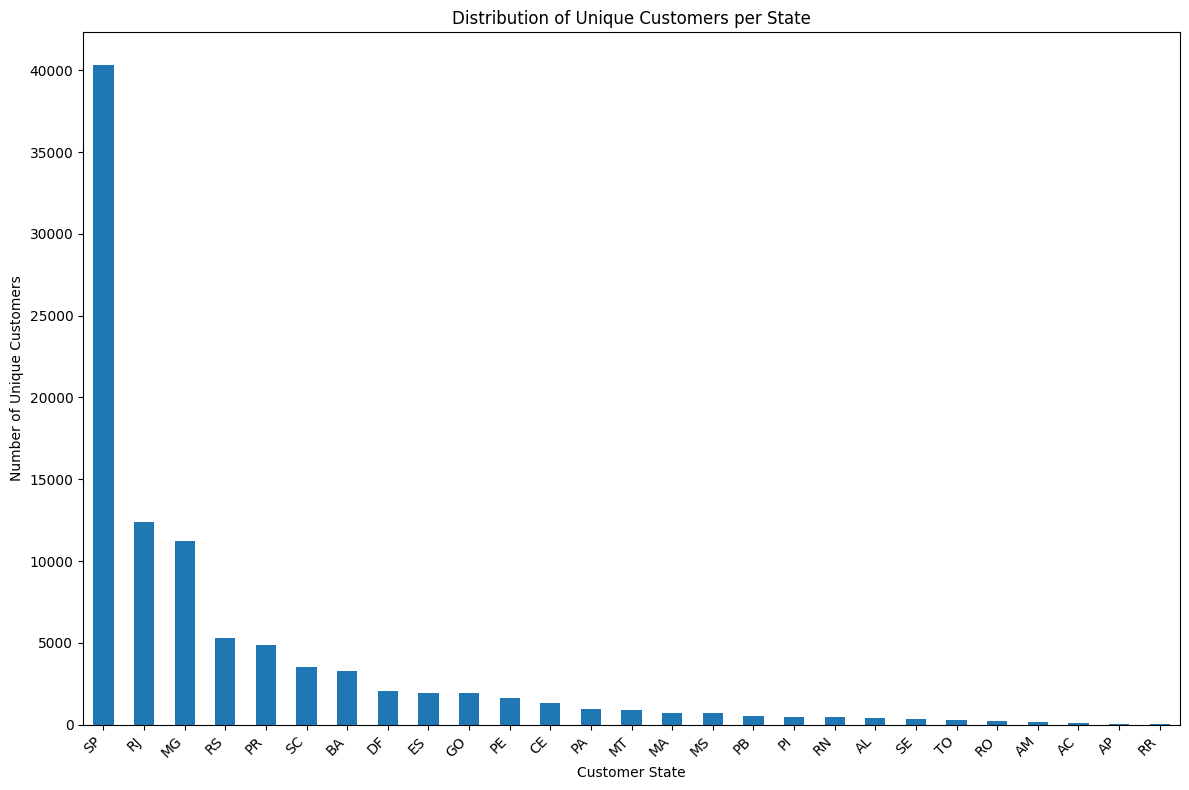

In [55]:
plt.figure(figsize=(12, 8))
customers_per_state.plot(kind='bar')
plt.title('Distribution of Unique Customers per State')
plt.xlabel('Customer State')
plt.ylabel('Number of Unique Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Negara bagian dengan jumlah pelanggan terbanyak adalah SP (São Paulo).

## Analisis Lanjutan (Opsional)
Analisis RFM (Recency, Frequency, Monetary Value) untuk setiap pelanggan unik. Ini adalah teknik yang bagus untuk memahami perilaku pelanggan berdasarkan seberapa baru mereka berbelanja, seberapa sering mereka berbelanja, dan berapa banyak yang mereka belanjakan.

## RFM Analysis (Recency, Frequency, Monetary Value)


Menggabungkan DataFrame pesanan, item pesanan, produk, dan pelanggan.

In [56]:
# Merge orders_df with orderitem_df
orders_items_df = pd.merge(
    orders_df,
    orderitem_df,
    on='order_id',
    how='inner' # Use inner merge to keep only orders that have items
)
print("Shape after merging orders and order_items:", orders_items_df.shape)

# Merge orders_items_df with products_df
orders_items_products_df = pd.merge(
    orders_items_df,
    products_df,
    on='product_id',
    how='left' # Use left merge to keep all order items, even if product info is missing (though we cleaned products_df)
)
print("Shape after merging with products:", orders_items_products_df.shape)

# Merge orders_items_products_df with orderpayment_df to include payment information
orders_items_products_payments_df = pd.merge(
    orders_items_products_df,
    orderpayment_df,
    on='order_id',
    how='left' # Use left merge to keep all order items and add payment info
)
print("Shape after merging with payments:", orders_items_products_payments_df.shape)


# Merge the combined dataframe with customers_df
all_data_combined_df = pd.merge(
    orders_items_products_payments_df,
    customers_df,
    on='customer_id',
    how='left' # Use left merge to keep all order items with their order, product, payment info, and add customer info
)
print("Shape after merging with customers:", all_data_combined_df.shape)


# Display the head of the combined DataFrame
display(all_data_combined_df.head())

Shape after merging orders and order_items: (112650, 14)
Shape after merging with products: (112650, 22)
Shape after merging with payments: (117604, 26)
Shape after merging with customers: (117604, 30)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,1.0,credit_card,1.0,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,3.0,voucher,1.0,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,8.0,13.0,2.0,voucher,1.0,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,1.0,boleto,1.0,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,1.0,credit_card,3.0,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO



Hitung metrik R, F, dan M untuk setiap pelanggan unik.

In [57]:
# Calculate Recency: Days since last purchase
# We need a reference date, typically the day after the last transaction in the dataset
snapshot_date = all_data_combined_df['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm_df = all_data_combined_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (snapshot_date - x.max()).days),
    Frequency=('order_id', 'nunique'), # Count unique orders per customer
    Monetary=('payment_value', 'sum') # Sum payment value per customer
).reset_index()

print("RFM metrics calculated:")
display(rfm_df.head())

RFM metrics calculated:


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19
2,0000f46a3911fa3c0805444483337064,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89


In [58]:
# Segmentasi customers berdasarkan skor RFM.

# Assign RFM scores using quartiles
# Recency: lower is better (more recent), so score 4 is lowest Recency
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 4, labels=[4, 3, 2, 1])
# Frequency: higher is better (more frequent), so score 4 is highest Frequency
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
# Monetary: higher is better (more spend), so score 4 is highest Monetary
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores into a single string
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)

# Display RFM scores and combined score
display(rfm_df.head())

# Define RFM segments based on RFM score
# Example segmentation logic (can be customized)
def rfm_segment(rfm_score):
    if rfm_score in ['444', '443', '434', '344', '343', '433', '334']: # High R, High F, High M
        return 'Champions'
    elif rfm_score in ['424', '423', '414', '413', '324', '314']: # High R, Medium/Low F, High M
        return 'Loyal Customers'
    elif rfm_score in ['442', '432', '342', '332', '323', '244', '243', '234']: # High R, High/Medium F, Medium/Low M
         return 'Potential Loyalists'
    elif rfm_score in ['422', '412', '322', '312', '224', '223', '214', '213']: # High R, Low F, Low M / Medium R, Medium/Low F, High/Medium M
         return 'Promising'
    elif rfm_score in ['144', '143', '134', '133']: # Low R, High F, High M
        return 'Can Be Loyal' # Used to be loyal, but haven't purchased recently
    elif rfm_score in ['333', '321', '311', '222', '221', '212', '124', '123', '114', '113', '132', '122']: # Medium R, Medium/Low F, Medium/Low M
        return 'Need Attention'
    elif rfm_score in ['331', '313', '233', '211', '142', '141', '131', '121', '112']: # Medium R, Low F, Low M / Low R, High F, Low M
        return 'About To Sleep' # Low R, Low F, Low M
    elif rfm_score in ['232', '231', '223', '212', '111', '112', '121', '131', '141', '211', '311', '321', '331']: # Low R, Low F, Low M (various combinations)
        return 'Hibernating'
    elif rfm_score in ['111']: # Lowest R, Lowest F, Lowest M
        return 'Lost Customers' # Very low Recency, Low F and M
    else:
        return 'Others' # Catch any other combinations

rfm_df['RFM_Segment'] = rfm_df['RFM_Score'].apply(rfm_segment)

# Display counts per segment
print("\nJumlah pelanggan per segmen RFM:")
display(rfm_df['RFM_Segment'].value_counts())

# Display head with segment
display(rfm_df.head())

,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,3,213



Jumlah pelanggan per segmen RFM:


,count
RFM_Segment,
Need Attention,17942
About To Sleep,13601
Potential Loyalists,11743
Promising,11717
Champions,11039
Others,10066
Loyal Customers,8732
Can Be Loyal,5848
Hibernating,4732


,customer_unique_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_Segment
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,141.90,4,1,3,413,Loyal Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,27.19,4,1,1,411,Others
2,0000f46a3911fa3c0805444483337064,542,1,86.22,1,1,2,112,About To Sleep
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,43.62,2,1,1,211,About To Sleep
4,0004aac84e0df4da2b147fca70cf8255,293,1,196.89,2,1,3,213,Promising



Analisis karakteristik setiap segmen RFM.

In [59]:
# Analisis karakteristik segmentasi RFM
rfm_segment_analysis = rfm_df.groupby('RFM_Segment').agg(
    AvgRecency=('Recency', 'mean'),
    AvgFrequency=('Frequency', 'mean'),
    AvgMonetary=('Monetary', 'mean'),
    SegmentSize=('customer_unique_id', 'count')
).reset_index()

# Sort by SegmentSize to see the largest segments first
rfm_segment_analysis_sorted_size = rfm_segment_analysis.sort_values(by='SegmentSize', ascending=False)

print("Karakteristik setiap segmen RFM:")
display(rfm_segment_analysis_sorted_size)

# Optional: Sort by AvgMonetary to see highest value segments
# rfm_segment_analysis_sorted_monetary = rfm_segment_analysis.sort_values(by='AvgMonetary', ascending=False)
# print("\nKarakteristik setiap segmen RFM (diurutkan berdasarkan rata-rata Monetary):")
# display(rfm_segment_analysis_sorted_monetary)

Karakteristik setiap segmen RFM:


,RFM_Segment,AvgRecency,AvgFrequency,AvgMonetary,SegmentSize
5,Need Attention,340.737042,1.000000,167.424155,17942
0,About To Sleep,353.933975,1.007646,77.233815,13601
7,Potential Loyalists,188.628460,1.071191,226.991966,11743
8,Promising,199.585815,1.000000,229.029945,11717
2,Champions,110.470967,1.148745,406.736868,11039
6,Others,137.907411,1.011524,49.975088,10066
4,Loyal Customers,97.427852,1.000000,408.243149,8732
1,Can Be Loyal,459.754275,1.093707,353.526428,5848
3,Hibernating,341.574176,1.000000,59.049791,4732


### Insight dari Analisis Segmen RFM:

- Need Attention: Merupakan segmen terbesar. Pelanggan di sini memiliki Recency dan Monetary rata-rata yang moderat hingga tinggi (sudah cukup lama tidak berbelanja dengan pengeluaran rata-rata yang lumayan), tetapi Frequency rata-rata hanya 1. Mereka membeli sekali dengan nilai cukup, tetapi tidak kembali. Mereka membutuhkan perhatian untuk mendorong pembelian kedua.
- About To Sleep: Segmen besar lainnya. Pelanggan di sini memiliki Recency yang tinggi (sudah lama tidak berbelanja), Frequency rata-rata hanya sedikit di atas 1 (mungkin satu atau dua kali beli), dan Monetary rata-rata yang rendah. Mereka berisiko menjadi tidak aktif.
- Potential Loyalists: Memiliki Recency yang relatif rendah (cukup baru berbelanja), Frequency sedikit di atas 1, dan Monetary rata-rata yang cukup tinggi. Mereka berpotensi menjadi pelanggan setia jika dikelola dengan baik setelah pembelian awal/kedua.
- Promising: Mirip dengan Potential Loyalists dengan Recency dan Monetary yang cukup baik, tetapi Frequency rata-rata hanya 1. Mereka menjanjikan karena baru-baru ini berbelanja dengan nilai yang baik, perlu didorong untuk pembelian berulang.
- Champions: Segmen yang lebih kecil tetapi paling bernilai. Mereka memiliki Recency terendah (baru saja berbelanja), Frequency tertinggi (sering berbelanja), dan Monetary tertinggi (pengeluaran paling besar). Ini adalah pelanggan terbaik Anda yang harus dihargai dan dipertahankan.
- Loyal Customers: Memiliki Recency yang sangat rendah (baru saja berbelanja) dan Monetary tertinggi (pengeluaran paling besar), tetapi Frequency rata-rata hanya 1. Mereka adalah pelanggan baru yang setia dengan pengeluaran tinggi di pembelian pertama.
- Can Be Loyal: Memiliki Recency yang sangat tinggi (sudah sangat lama tidak berbelanja), tetapi Frequency dan Monetary rata-rata relatif tinggi. Mereka dulunya setia/bernilai tetapi sudah lama tidak aktif. Mungkin perlu kampanye reaktivasi khusus.
- Hibernating: Recency, Frequency, dan Monetary rata-rata rendah. Mereka sudah lama tidak berbelanja, jarang berbelanja, dan pengeluarannya rendah. Mereka tidak aktif dan mungkin sulit untuk diaktifkan kembali.
- Others: Segmen lain yang tidak masuk dalam definisi segmen utama, dengan berbagai kombinasi skor.


## Kesimpulan

- Kesimpulan untuk Pertanyaan Bisnis 1: Produk paling laris berdasarkan jumlah pesanan adalah produk dengan ID `aca2eb7d00ea1a7b8ebd4e68314663af` (kategori: furniture\_decor) dengan 527 pesanan. Produk paling kurang laris adalah beberapa produk yang masing-masing hanya memiliki 1 pesanan dari berbagai kategori seperti home\_appliances, watches\_gifts, bed\_bath\_table, furniture\_decor, dan stationery.

- Kesimpulan untuk Pertanyaan Bisnis 2 : Negara bagian dengan jumlah pelanggan terbanyak adalah SP (São Paulo).

- Analisis RFM berhasil mengsegmentasi basis pelanggan e-commerce ke dalam kelompok-kelompok yang berbeda berdasarkan perilaku pembelian terbaru, frekuensi, dan nilai pengeluaran mereka. Identifikasi segmen-segmen seperti 'Champions' (pelanggan terbaik), 'Need Attention' (pelanggan satu kali beli bernilai moderat yang berpotensi hilang), dan 'About To Sleep' (pelanggan yang berisiko tidak aktif) memberikan wawasan yang dapat ditindaklanjuti. Informasi ini sangat berharga untuk mengembangkan strategi pemasaran yang ditargetkan, program retensi pelanggan, dan alokasi sumber daya yang lebih efektif.

## Mempersiapkan Data untuk Visualisasi (Streamlit)

Siapkan data untuk visualisasi produk terlaris/kurang laris.

In [60]:
# Ensure product_order_counts is available (recalculate if needed)
if 'product_order_counts' not in locals():
    product_order_counts = orderitem_df['product_id'].value_counts()

# Convert series to DataFrame for merging
product_order_counts_df = product_order_counts.reset_index()
product_order_counts_df.rename(columns={'index': 'product_id', 'count': 'order_count'}, inplace=True)

# Merge with products_df to get product info
product_sales_info_df = pd.merge(
    product_order_counts_df,
    products_df[['product_id', 'product_category_name']], # Select only relevant columns
    on='product_id',
    how='left' # Use left merge to keep all products from order_counts
)

# Merge with translation data to get English category names
product_sales_viz_df = pd.merge(
    product_sales_info_df,
    product_category_name_translation_df,
    on='product_category_name',
    how='left' # Use left merge
)

# Handle potential missing English category names if product_category_name was missing or not in translation
product_sales_viz_df['product_category_name_english'].fillna('unknown', inplace=True)

print("Data siap untuk visualisasi produk terlaris/kurang laris:")
display(product_sales_viz_df.head())
display(product_sales_viz_df.tail())

Data siap untuk visualisasi produk terlaris/kurang laris:


/tmp/ipython-input-832201133.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  product_sales_viz_df['product_category_name_english'].fillna('unknown', inplace=True)


,product_id,order_count,product_category_name,product_category_name_english
0,aca2eb7d00ea1a7b8ebd4e68314663af,527,moveis_decoracao,furniture_decor
1,99a4788cb24856965c36a24e339b6058,488,cama_mesa_banho,bed_bath_table
2,422879e10f46682990de24d770e7f83d,484,ferramentas_jardim,garden_tools
3,389d119b48cf3043d311335e499d9c6b,392,ferramentas_jardim,garden_tools
4,368c6c730842d78016ad823897a372db,388,ferramentas_jardim,garden_tools


,product_id,order_count,product_category_name,product_category_name_english
32946,038c0dd7c1e48a1588f8919a0c305727,1,eletrodomesticos,home_appliances
32947,aa20709d44e96059764f1b0386d3bcfa,1,relogios_presentes,watches_gifts
32948,9ae3dacfd2327107a1e28274fac25a4e,1,cama_mesa_banho,bed_bath_table
32949,0c398b245c9b74ef2bf4343b6fe73237,1,moveis_decoracao,furniture_decor
32950,446295cf6f689d4db477145815362608,1,papelaria,stationery


In [61]:
product_sales_viz_df.to_csv("product_sales_viz_data.csv", index=False)
print("DataFrame 'product_sales_viz_df' berhasil disimpan ke 'product_sales_viz_data.csv'")

DataFrame 'product_sales_viz_df' berhasil disimpan ke 'product_sales_viz_data.csv'



Siapkan data distribusi pelanggan per negara bagian untuk visualisasi.

In [62]:
# Calculate the number of unique customers per state
# Ensure customers_df is available (recalculate if needed)
if 'customers_df' not in locals():
    # If customers_df is not in locals, it means it was not loaded in this session.
    # Although unlikely if previous cells were run, add a safeguard.
    # In a real scenario, you'd reload data or use a function.
    print("Warning: customers_df not found. Please ensure data loading cells are run.")
    # Assuming it is available based on notebook state history

customers_per_state_viz = customers_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()
customers_per_state_viz.rename(columns={'customer_unique_id': 'unique_customer_count'}, inplace=True)

print("Data distribusi pelanggan per negara bagian siap untuk visualisasi:")
display(customers_per_state_viz.head())

Data distribusi pelanggan per negara bagian siap untuk visualisasi:


,customer_state,unique_customer_count
0,AC,77
1,AL,401
2,AM,143
3,AP,67
4,BA,3277


In [63]:
customers_per_state_viz.to_csv("customers_per_state_data.csv", index=False)
print("DataFrame 'customers_per_state_viz' berhasil disimpan ke 'customers_per_state_data.csv'")

DataFrame 'customers_per_state_viz' berhasil disimpan ke 'customers_per_state_data.csv'



Siapkan ringkasan data RFM untuk visualisasi.

In [64]:
# The DataFrame rfm_segment_analysis_sorted_size is already a good summary for visualization.
# Display it to confirm.
print("Ringkasan data segmen RFM siap untuk visualisasi:")
display(rfm_segment_analysis_sorted_size)

Ringkasan data segmen RFM siap untuk visualisasi:


,RFM_Segment,AvgRecency,AvgFrequency,AvgMonetary,SegmentSize
5,Need Attention,340.737042,1.000000,167.424155,17942
0,About To Sleep,353.933975,1.007646,77.233815,13601
7,Potential Loyalists,188.628460,1.071191,226.991966,11743
8,Promising,199.585815,1.000000,229.029945,11717
2,Champions,110.470967,1.148745,406.736868,11039
6,Others,137.907411,1.011524,49.975088,10066
4,Loyal Customers,97.427852,1.000000,408.243149,8732
1,Can Be Loyal,459.754275,1.093707,353.526428,5848
3,Hibernating,341.574176,1.000000,59.049791,4732


In [65]:
rfm_segment_analysis_sorted_size.to_csv("rfm_segment_summary_data.csv", index=False)
print("DataFrame 'rfm_segment_analysis_sorted_size' berhasil disimpan ke 'rfm_segment_summary_data.csv'")

DataFrame 'rfm_segment_analysis_sorted_size' berhasil disimpan ke 'rfm_segment_summary_data.csv'


Menyiapkan dataset gabungan

In [66]:
all_data_combined_df.to_csv("all_data_combined.csv", index=False)
print("DataFrame 'all_data_combined_df' berhasil disimpan ke 'all_data_combined.csv'")

DataFrame 'all_data_combined_df' berhasil disimpan ke 'all_data_combined.csv'
